In [2]:
!pip3 install opencv-python


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

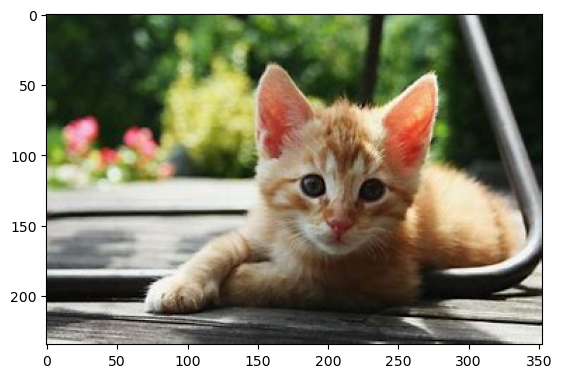

In [8]:
filename="cat.JPEG"
img= read_file(filename)

# Creating edge mask

In [16]:
def edge_mask(img, line_size, blur_value):
    gray=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray, blur_value)
    edges=cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges

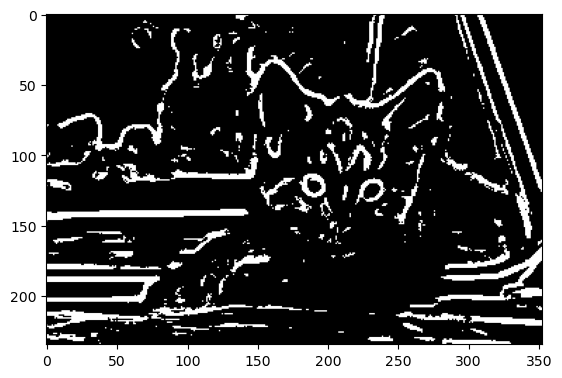

In [18]:
line_size, blur_value=7,7
edges= edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap="binary")
plt.show()

# Reduce the color palette


In [20]:
def color_quantization(img, k):
    #Transform the image
    data=np.float32(img).reshape((-1,3))
    
    #Determine the criteria
    criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    #Implementing K-Means
    ret, label, center= cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    
    return result

# Combine Edge Mask with quantiz img

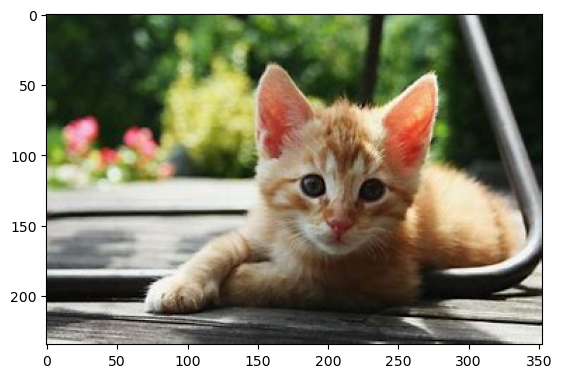

In [22]:
img_quantiz=color_quantization(img , k=9)

plt.imshow(img)
plt.show()

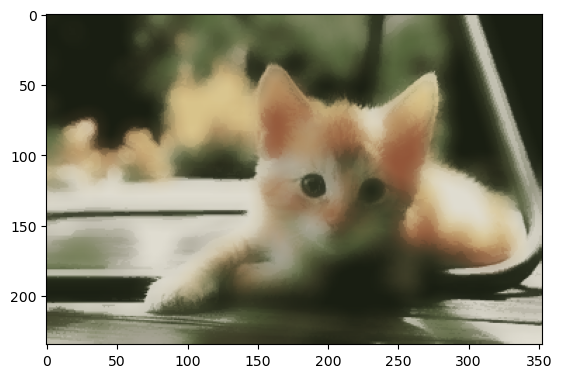

In [24]:
#Reduce the noise
blurred=cv2.bilateralFilter(img_quantiz, d=20, sigmaColor=200, sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [26]:
def cartoon():
    c=cv2.bitwise_and(blurred, blurred, mask=edges)
    plt.imshow(c)
    plt.title("Cartoonified_img")
    plt.show

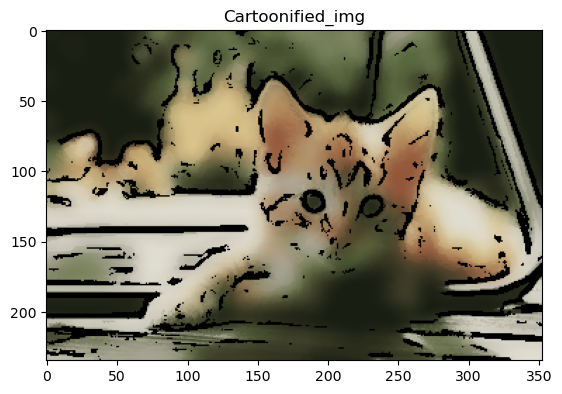

In [28]:
cartoon()